In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from particle import Particle
from pid import PID

In [2]:
acc = []
pos = []
vel = []

# particle init condition
weight = 10.0
position = 10.0
velocity = 0.0

# time condition
init_time = 0.0
final_time = 100
dt = 0.01

# pid param
target = 0.0
kp = 100
ki = 0
kd = 100

In [3]:
timestamp = np.arange(init_time, final_time, dt)
point = Particle(weight, position, velocity)
pid = PID(100)
pid.set_param(kp, ki, kd)

In [4]:
for i in timestamp:
    if i > final_time*2/3:
        target = 10
    elif i > final_time*1/3:
        target = 1
    
    a, v, p = point.force(pid.calc(point.position, target, dt), dt)
    acc.append(a)
    pos.append(p)
    vel.append(v)

(0.0, 100)

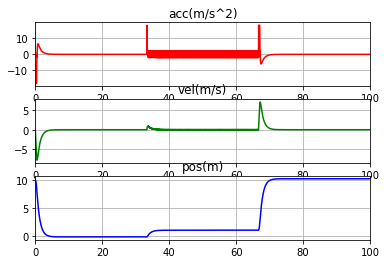

In [5]:
fig, (ax1, ax2, ax3) = plt.subplots(3)

ax1.plot(timestamp, acc, 'r-')
ax1.set_title('acc(m/s^2)')
ax1.grid()
ax1.set_xlim([init_time, final_time])

ax2.plot(timestamp, vel, 'g-')
ax2.set_title('vel(m/s)')
ax2.grid()
ax2.set_xlim([init_time, final_time])

ax3.plot(timestamp, pos, 'b-')
ax3.set_title('pos(m)')
ax3.grid()
ax3.set_xlim([init_time, final_time])
# ax3.axis([init-time, final_time, -position, position])

[0.0, 100, -1.1, 1.1]

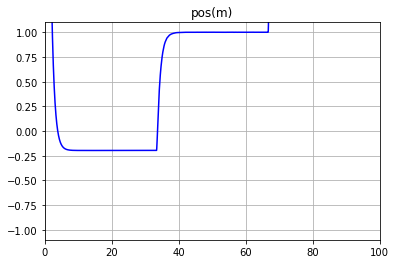

In [6]:
plt.plot(timestamp, pos, 'b-')
plt.grid()
plt.title('pos(m)')
# plt.xlim([init_time, final_time])
plt.axis([init_time, final_time, -1.1, 1.1])
# plt.xlim([init_time, 30])
# plt.axis([init_time, 40, -1, 1])

(0.0, 100)

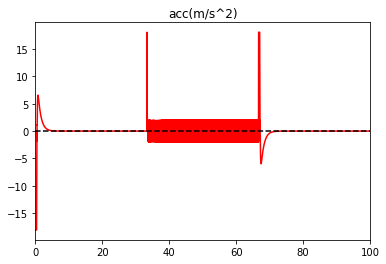

In [7]:
plt.plot(timestamp, acc, 'r-', [0]*int(final_time/dt), 'k--')
plt.title('acc(m/s^2)')
plt.xlim([init_time, final_time])
# plt.axis([init_time, final_time, -10, 10])

In [8]:
pd.DataFrame({"acc":acc, "vel":vel, "pos":pos}, index=timestamp)

,acc,vel,pos
0.00,-18.038,-0.18038,9.999098
0.01,-18.038,-0.36076,9.996392
0.02,-18.038,-0.54114,9.991883
0.03,-18.038,-0.72152,9.985570
0.04,-18.038,-0.90190,9.977453
...,...,...,...
99.95,0.000,0.00000,10.196199
99.96,0.000,0.00000,10.196199
99.97,0.000,0.00000,10.196199
99.98,0.000,0.00000,10.196199


In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
from control import Control

In [2]:
# particle init condition
weight = 10.0
position = 10.0
velocity = 0.0

# time condition
init_time = 0.0
final_time = 100
dt = 0.01

# pid param
target = [0, 10]
kp = 100
ki = 0
kd = 100
que_len = 100

In [3]:
ctl = Control()
ctl.set_point(weight, position, velocity)
ctl.set_PID(kp, ki, kd, que_len)
ctl.set_timestamp(init_time, final_time, dt)
df = ctl.start(target, dt=dt)

(0.0, 100)

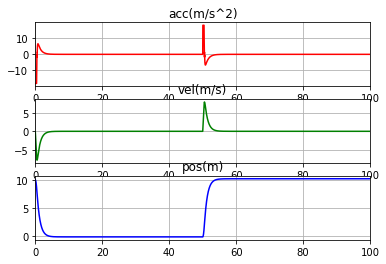

In [4]:
fig, (ax1, ax2, ax3) = plt.subplots(3)

ax1.plot(df['acc'], 'r-')
ax1.set_title('acc(m/s^2)')
ax1.grid()
ax1.set_xlim([init_time, final_time])

ax2.plot(df['vel'], 'g-')
ax2.set_title('vel(m/s)')
ax2.grid()
ax2.set_xlim([init_time, final_time])

ax3.plot(df['pos'], 'b-')
ax3.set_title('pos(m)')
ax3.grid()
ax3.set_xlim([init_time, final_time])
# ax3.axis([init-time, final_time, -position, position])

[0.0, 100, -1.1, 1.1]

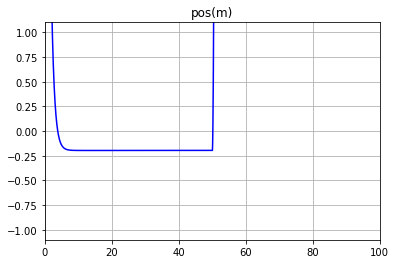

In [5]:
plt.plot(df['pos'], 'b-')
plt.grid()
plt.title('pos(m)')
# plt.xlim([init_time, final_time])
plt.axis([init_time, final_time, -1.1, 1.1])
# plt.xlim([init_time, 30])
# plt.axis([init_time, 40, -1, 1])